# <center><a href='https://mybinder.org/v2/gh/fortierq/binder-mp2i/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fmp2i-fsm%252Fmp2i-2021%26urlpath%3Dlab%252Ftree%252Fmp2i-2021%252F4_c%252Fcours%252F5_struct.ipynb%26branch%3Dmain'>Structures                                   <img src=https://mybinder.org/badge.svg></a></center>

## Utilisation

Une structure est un regroupement de variables (des attributs) et s'utilise de la façon suivante :

In [1]:
struct nom_structure { // définition d'un type nom_structure
    // objets dans la structures
};

struct nom_structure x; // variable x de type nom_structure

Pour éviter d'écrire `struct nom_structure` à chaque définition de variable, on peut écrire à la place :

In [2]:
typedef struct nom_structure { // définition d'un type nom_structure
    // objets dans la structures
} nom_structure;

Exemple concret :

In [3]:
typedef struct humain {
    int age; 
    float taille; // en m
    float poids; // en kg
} humain;

Voici comment créer une variable de ce type et modifier ses attributs :

In [4]:
humain h1;
h1.taille

0.00000f

In [5]:
humain h; // définition d'une variable h de type humain
h.age = 20; // modifier l'attribut age de h
h.poids = 70.;
h.taille = 1.75;

In [6]:
h.age // obtenir l'attribut age de h

20

## Initialisation 

On peut aussi initialiser une structure en donnant une valeur pour chaque attribut, entre accolades :

In [7]:
humain h = {.taille = 175, .poids = 70, .age = 20}

Ou même sans spécifier les attributs (en les mettant dans l'ordre) :

In [8]:
humain h = {20, 70, 1.75}

Une `struct` ressemble donc beaucoup aux type enregistrements (*record*) en OCaml. Voici l'équivalent en OCaml :
```ocaml
type humain = {age : int; taille : float; poids : float; nom : string};;
let h = {age = 20; taille = 175; poids = 70};;
h.age (* donne 20 *)
```

## Structures et pointeurs

Il est possible de définir un pointeur sur une structure :

In [9]:
humain* p = &h;

`*p` est alors une structure, et on peut accéder à ses attributs avec `(*p).` :

In [10]:
(*p).age

20

Il existe une notation plus pratique pour faire la même chose :

In [11]:
p->age  // attribut age de la struct pointée par p

20

Il est aussi possible de créer une variable de type `humain` dans le tas, avec `malloc` :

In [12]:
humain* p = (humain*)malloc(sizeof(humain));

In [13]:
p->age = 25

25

In [14]:
p->age

25

In [15]:
p->taille

3.07501e-41f

**Remarque** : La taille en mémoire d'une `struct` n'est pas forcément la somme des tailles de ses attributs, car des octets peuvent être rajoutés pour [aligner les données](https://fr.wikipedia.org/wiki/Alignement_en_m%C3%A9moire) (*data alignment*) :

In [16]:
sizeof(humain)

12

On peut ensuite modifier et accéder aux attributs de `*p` :

In [17]:
p->taille = 160;

In [18]:
p->taille

160.000f

... Et libérer la mémoire quand on n'en a plus besoin :

In [19]:
free(p);

## Structures et fonctions

Il est possible de passer une structure en argument d'une fonction. Par exemple par valeur :

In [20]:
float imc(humain h) {
    return h.poids/(h.taille*h.taille);
}

imc(h)

0.000357143f

On peut aussi renvoyer une `struct` par une fonction :

In [21]:
humain manger_raclette(humain h1) { // renvoie un nouveau humain obtenu après avoir mangé 1kg
    humain h2;
    h2.age = h1.age;
    h2.poids = h1.poids + 1.;
    h2.taille = h1.taille;
    return h2;
}

Ici, même si `h2` est une variable locale, sa valeur peut être copiée et donc récupérée :

In [22]:
humain h2 = manger_raclette(h);
h2.poids

2.75000f

Par contre, on ne pourrait pas modifier l'argument avec un passage de copie/valeur :

In [23]:
void manger_raclette(humain h1) { // passage par valeur
    h1.poids = h1.poids + 1.;
}

manger_raclette(h);
h.poids // h n'a pas été modifié car h1 est une copie de h dans manger_raclette

1.75000f

Pour modifier l'argument, il faut le passer par adresse :

In [24]:
void manger_raclette(humain *ptr_h) { // passage par adresse
    (ptr_h->poids)++;
}

manger_raclette(&h);
h.poids // h a été modifié

2.75000f

**Exercice** : 
1. Écrire une structure `complexe` permettant de représenter un nombre complexe.  
2. Écrire les opérations classiques sur les nombres complexes, avec passage par valeur : addition, multiplication, division, module.  
3. Écrire une fonction `rotation` permettant de faire une rotation sur un nombre complexe (remplacer $z$ par $ze^{i \theta}$) avec le prototype suivant :  
```c
void rotation(complexe* z, float theta)
```  
**Indice** : En écrivant $z = a + ib$ et $e^{i\theta}$, la rotation de $z$ d'angle $\theta$ est obtenue par $ze^{i\theta} = ...$. On utilisera les fonctions `cos` et `sin`.

In [25]:
// 1.

typedef struct complexe {
    double re;    
    double im;
} complexe;

In [26]:
// 2. Voici le corrigé de add. Les autres sont similaires.

complexe add(complexe z1, complexe z2) {
    complexe z;
    z.re = z1.re + z2.re;
    z.im = z1.im + z2.im;
    return z;
}
complexe z;
z.re = 2;
z.im = 1;
z = add(z, z);
printf("re = %f, im = %f", z.re, z.im);

re = 4.000000, im = 2.000000

In [27]:
// 3. On a ze^{i theta} = acos(theta) - bsin(theta) + i(a sin(theta) + b cos(theta))
void rotation(complexe* z, double theta) {
    z->re = z->re*cos(theta) - z->im*sin(theta);
    z->im = z->re*sin(theta) + z->im*cos(theta);
}

rotation(&z, 3.14);
printf("re = %f, im = %f", z.re, z.im);

re = -4.003180, im = -2.006373

## Structures récursives

Il est possible d'utiliser un type de structure à l'intérieur de la définition de ce type. Exemple avec une liste chaînée :

In [28]:
typedef struct list {
    int elem;
    list* next;
} list;

**Remarque** : Il ne serait pas possible d'utiliser un `list` (au lieu d'un `list*`) comme attribut de `list`.

<center>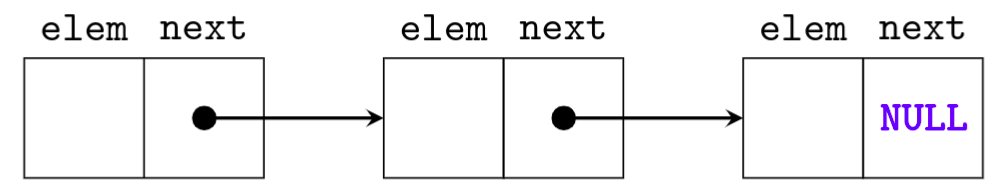</center>

Création de liste contenant 1 et 2 :

In [29]:
list* l = NULL;  // initialement liste vide
l = (list*)malloc(sizeof(list));  // création du premier noeud de la liste
l->elem = 1;
l->next = (list*)malloc(sizeof(list));  // deuxième noeud
l->next->elem = 2;
l->next->next = NULL;

In [30]:
printf("1er élément : %d, 2ème élément : %d", l->elem, l->next->elem);

1er élément : 1, 2ème élément : 2

**Remarque** : Il ne serait pas possible de changer la définition de `list` en utilisant un `list` en attribut (au lieu d'un pointeur `list*`).

**Exercice** : Définir une liste doublement chaînée et une fonction permettant de supprimer un noeud.

In [31]:
typedef struct list2 {
    int elem;
    list2* next;
    list2* prev;
} list2;

In [32]:
void del(list2* l) {
    l->next->prev = l->prev;
    l->prev->next = l->next;
    free(l);
}